##  3.4. Validación Cruzada Leave-One-Out (LOOCV)

**Leave-One-Out Cross Validation (LOOCV)** es una forma extrema de validación cruzada donde se utiliza **una sola muestra como conjunto de prueba** en cada iteración, y el resto del dataset como entrenamiento.

Es considerado un caso especial de **K-Fold**, donde **K es igual al número total de observaciones**.

---

###  ¿Cómo funciona?

1. Se deja **un solo dato fuera** para validación.
2. Se entrena el modelo con todos los datos restantes.
3. Se repite este proceso **una vez por cada observación**.

---

###  Ventajas:
- Utiliza casi todo el dataset en cada iteración.
- Ideal para **datasets pequeños**.
- Proporciona una evaluación **muy estable** y con baja varianza.

###  Desventajas:
- Puede ser **computacionalmente costoso** si el dataset es muy grande.


# Preparación del dataset y modelo

In [1]:
# Paso 1: Importamos librerías necesarias
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score


# Generar datos y definir el modelo

In [2]:
# Paso 2: Generar un dataset pequeño con una sola característica
# Agregamos ruido para simular datos reales
X, y = make_regression(n_samples=20, n_features=1, noise=10, random_state=0)

# Paso 3: Crear una instancia del modelo de regresión lineal
modelo = LinearRegression()


# Aplicar LOOCV y calcular el error

In [3]:
# Paso 4: Crear el esquema de validación Leave-One-Out
loocv = LeaveOneOut()

# Paso 5: Evaluar el modelo usando LOOCV
# Usamos el Error Cuadrático Medio como métrica (MSE)
# sklearn devuelve el error negativo, así que lo invertimos para interpretarlo
scores = cross_val_score(modelo, X, y, cv=loocv, scoring='neg_mean_squared_error')

# Paso 6: Mostrar el promedio de los errores de validación
print(f"📉 Promedio del error (LOOCV - MSE): {-scores.mean():.2f}")


📉 Promedio del error (LOOCV - MSE): 85.87


###  Interpretación del resultado

En este ejemplo, el modelo se entrenó **20 veces**, dejando fuera una muestra distinta en cada iteración.  
Luego se calculó el **Error Cuadrático Medio (MSE)** en cada uno de esos casos.

- Este enfoque garantiza que **cada dato fue utilizado como prueba exactamente una vez**.
- El resultado mostrado es el **promedio del error**, lo que nos da una estimación muy confiable del rendimiento general del modelo.

 Aunque LOOCV es muy preciso, es recomendable **solo cuando el dataset es pequeño**, ya que el tiempo de cómputo puede crecer rápidamente si hay muchas observaciones.


###  Comparación visual: K-Fold vs LOOCV

Esta visualización muestra claramente la diferencia entre ambos métodos:

| Método      | Número de iteraciones | Datos usados como prueba por iteración | ¿Todos los datos se usan como test? |
|-------------|------------------------|-----------------------------------------|--------------------------------------|
| **K-Fold**  | K (en este caso, 4)    | Un grupo distinto en cada fold         | ✅ Sí (una vez por iteración)        |
| **LOOCV**   | N (una por muestra)    | Solo 1 dato por iteración              | ✅ Sí (exactamente una vez cada uno) |

 **Observaciones:**
- En K-Fold se validan *bloques completos de datos* → más rápido, menos iteraciones.
- En LOOCV se prueba con **cada dato por separado**, lo que resulta en **más precisión pero mayor costo computacional**.

 Ambos métodos usan **todos los datos**, pero lo hacen de formas muy distintas.  
Escoger uno u otro depende del **tamaño del dataset** y del **costo computacional que estemos dispuestos a pagar**.


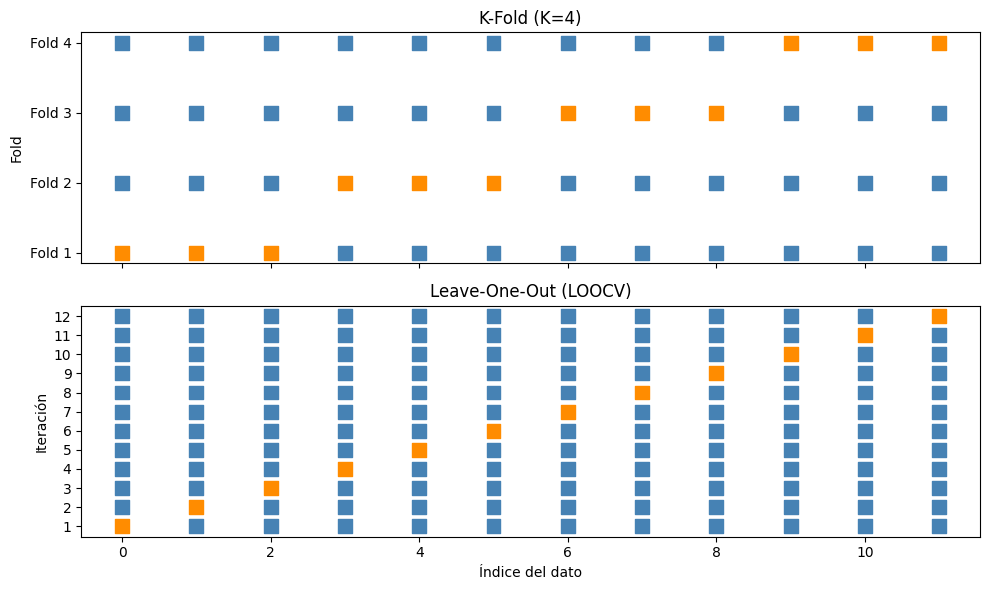

In [4]:
# Paso 8: Comparación visual entre K-Fold y LOOCV

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold, LeaveOneOut

# Simulamos un dataset con 12 muestras
n_samples = 12
X_demo = np.arange(n_samples).reshape(-1, 1)

# Esquema 1: K-Fold (K=4)
kf = KFold(n_splits=4, shuffle=False)

# Esquema 2: LOOCV
loo = LeaveOneOut()

# Crear figura con dos subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Visualización de K-Fold
axs[0].set_title("K-Fold (K=4)", fontsize=12)
for i, (train_idx, test_idx) in enumerate(kf.split(X_demo)):
    colores = np.full(n_samples, 'lightgray', dtype=object)
    colores[train_idx] = 'steelblue'
    colores[test_idx] = 'darkorange'
    axs[0].scatter(range(n_samples), [i]*n_samples, c=colores, s=100, marker='s')

axs[0].set_ylabel("Fold")
axs[0].set_yticks(range(4))
axs[0].set_yticklabels([f'Fold {i+1}' for i in range(4)])

# Visualización de LOOCV
axs[1].set_title("Leave-One-Out (LOOCV)", fontsize=12)
for i, (train_idx, test_idx) in enumerate(loo.split(X_demo)):
    colores = np.full(n_samples, 'lightgray', dtype=object)
    colores[train_idx] = 'steelblue'
    colores[test_idx] = 'darkorange'
    axs[1].scatter(range(n_samples), [i]*n_samples, c=colores, s=100, marker='s')

axs[1].set_ylabel("Iteración")
axs[1].set_yticks(range(n_samples))
axs[1].set_yticklabels([f'{i+1}' for i in range(n_samples)])

# Estética común
plt.xlabel("Índice del dato")
plt.tight_layout()
plt.show()
